In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/costa-rican-household-poverty-prediction/sample_submission.csv
/kaggle/input/costa-rican-household-poverty-prediction/codebook.csv
/kaggle/input/costa-rican-household-poverty-prediction/train.csv.zip
/kaggle/input/costa-rican-household-poverty-prediction/sample_submission.csv.zip
/kaggle/input/costa-rican-household-poverty-prediction/codebook.xlsx
/kaggle/input/costa-rican-household-poverty-prediction/train.csv
/kaggle/input/costa-rican-household-poverty-prediction/test.csv
/kaggle/input/costa-rican-household-poverty-prediction/test.csv.zip


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

In [3]:
pd.options.display.max_columns = 150

train = pd.read_csv('../input/costa-rican-household-poverty-prediction/train.csv')
test = pd.read_csv('../input/costa-rican-household-poverty-prediction/test.csv')
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


Text(0.5, 1.0, 'Count of Unique Values in Integer Columns')

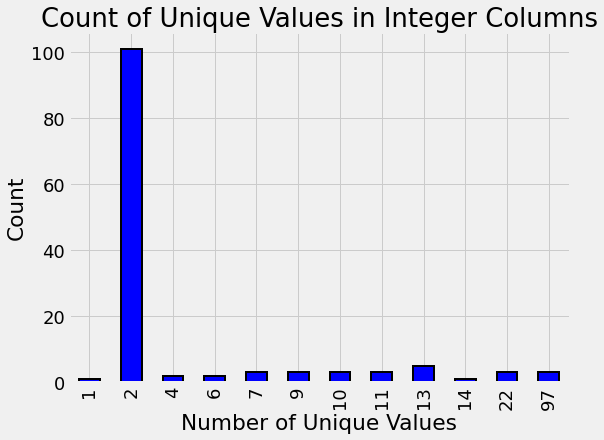

In [6]:
train.select_dtypes(np.int64).nunique().value_counts().sort_index().plot.bar(color = 'blue',
                                                                            figsize = (8,6),
                                                                            edgecolor = 'k',
                                                                            linewidth = 2)
plt.xlabel('Number of Unique Values')
plt.ylabel('Count')
plt.title('Count of Unique Values in Integer Columns')

### float columns
* OrderedDict
    * to map the poverty levels to colors
    * because this keeps the keys and values in the same order as we specify

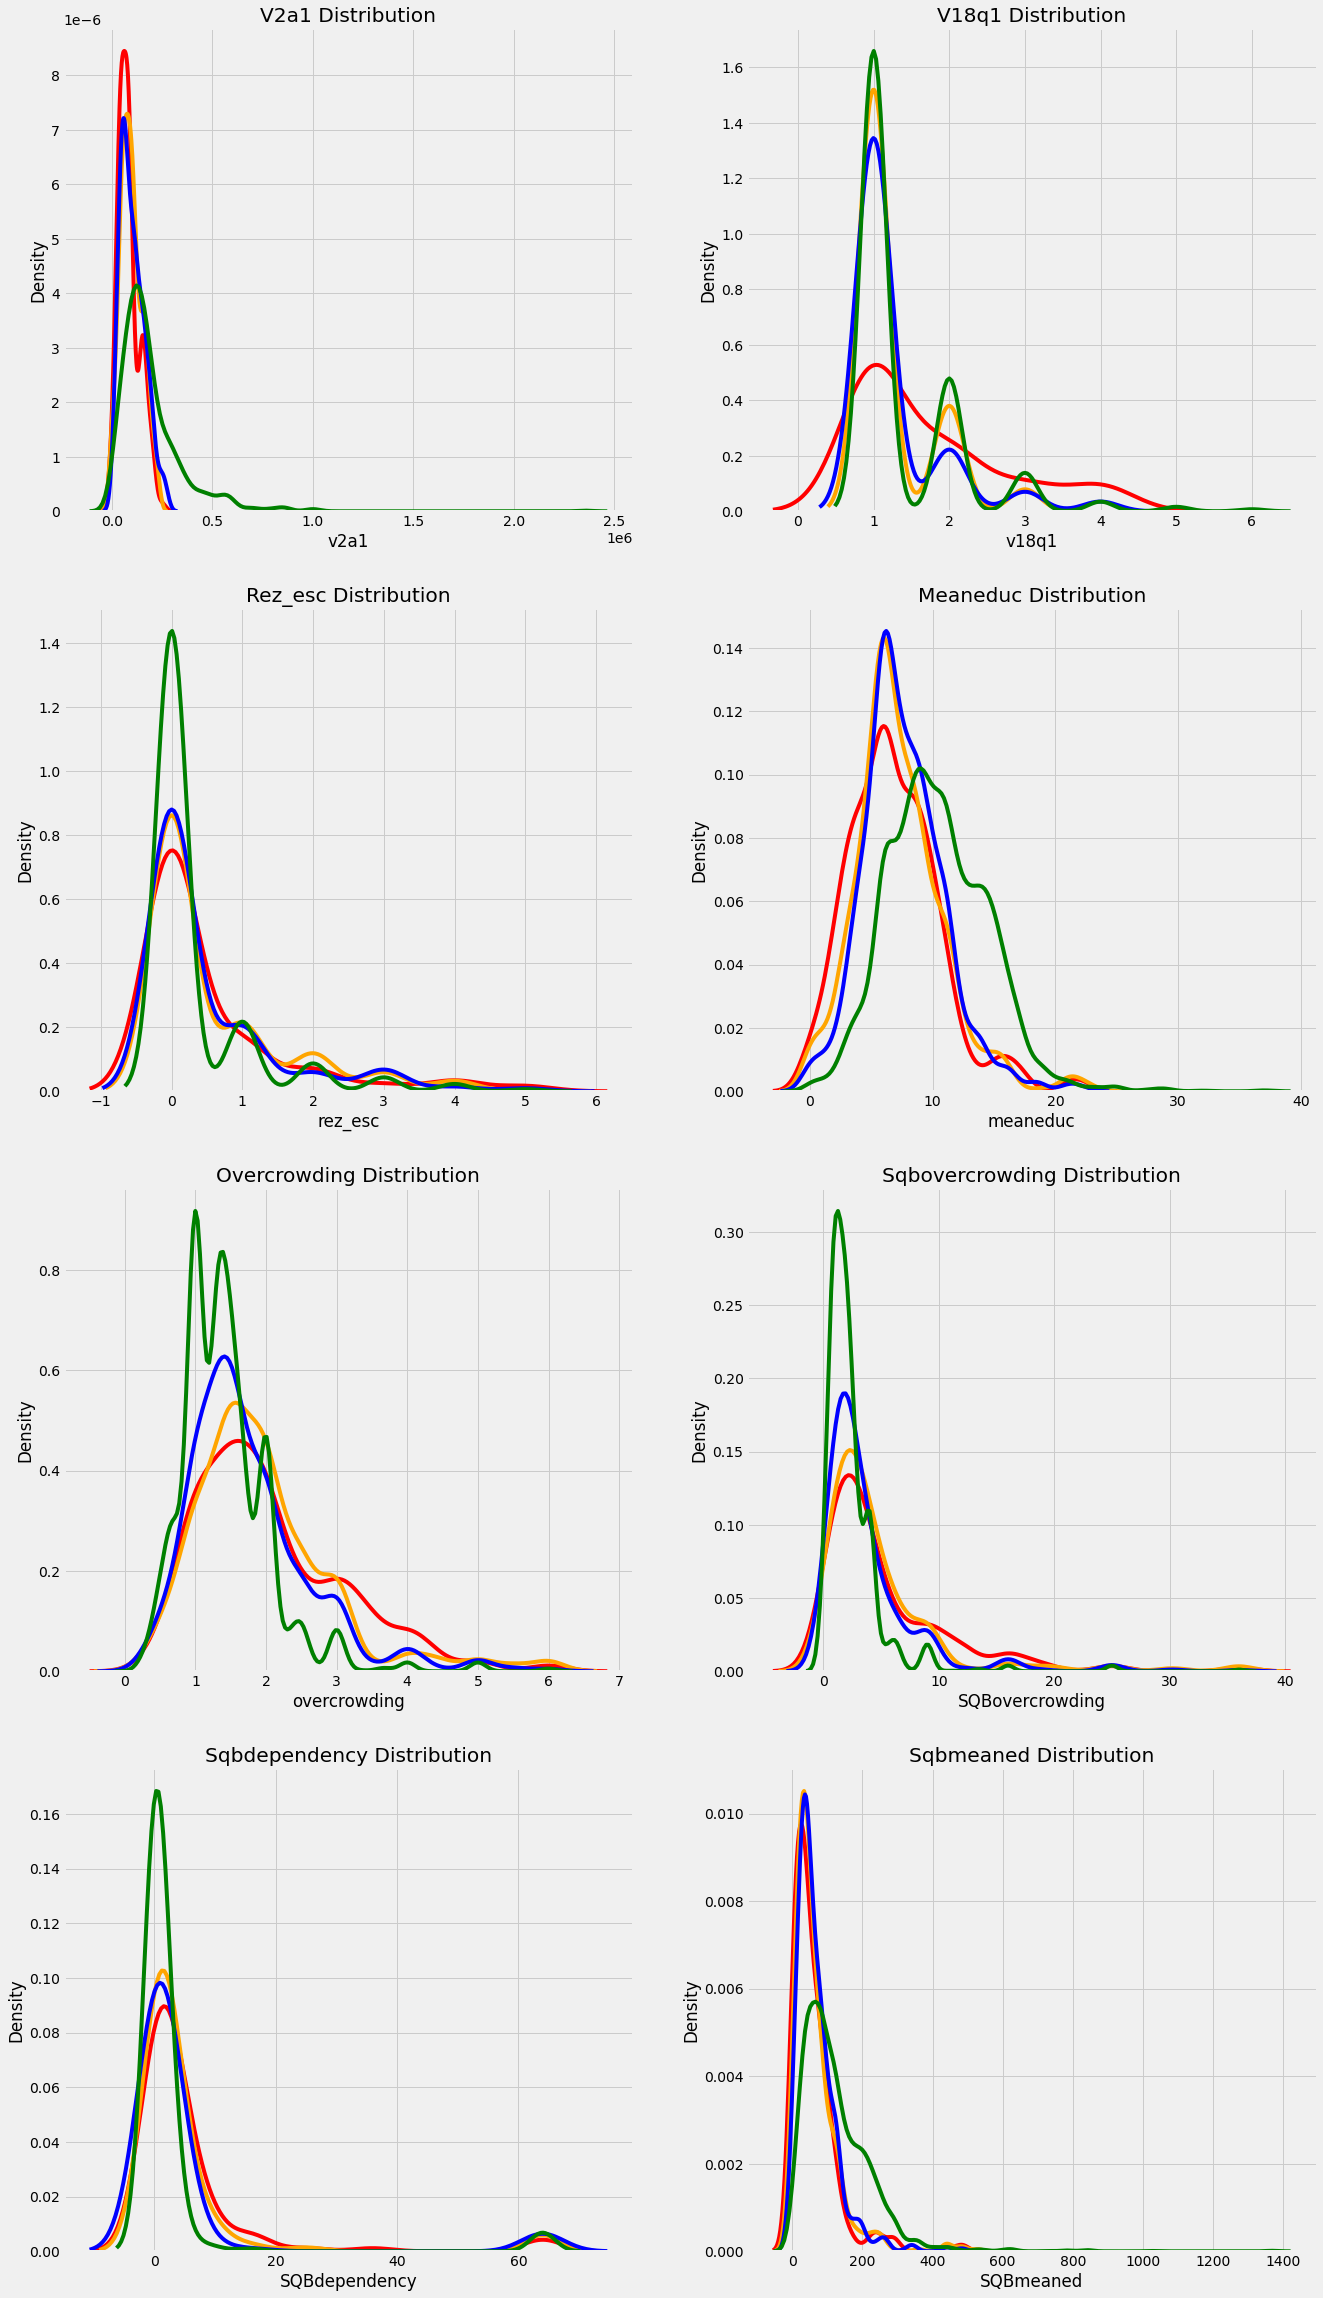

In [7]:
#the distributions of the float columns colored by the value of the Target.
from collections import OrderedDict

plt.figure(figsize = (20,16))
plt.style.use('fivethirtyeight')

colors = OrderedDict({1:'red',2:'orange',3:'blue',4:'green'})
poverty_mapping = OrderedDict({1:'extrme',2:'moderate',3:'vulnerable',4:'non vulnerable'})

#iteragte through the float columns
for i, col in enumerate(train.select_dtypes('float')):
    ax = plt.subplot(4,2, i+1)
    #그림 위치를 설정해주는 것 같은데?
    for poverty_level, color in colors.items():
        #.items() : 딕셔너리의 key,value 출력 가능 함수
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(),
                   ax = ax, color = color, label = poverty_mapping[poverty_level])
        plt.title(f'{col.capitalize()} Distribution')
        plt.xlabel(f'{col}')
        plt.ylabel('Density')

plt.subplots_adjust(top = 2)

In [8]:
train.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [10]:
train.loc[:,col]

0       100.0000
1       144.0000
2       121.0000
3       121.0000
4       121.0000
          ...   
9552     68.0625
9553     68.0625
9554     68.0625
9555     68.0625
9556     68.0625
Name: SQBmeaned, Length: 9557, dtype: float64

###### will calculate correlations between the variables and the target to gauge the relationships between the features

### Object Columns

In [11]:
train.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


#### 데이터프레임 내에 열의 값 변경하기

In [12]:
mapping = {'yes':1, 'no':0}

#데이터프레임 내 일부 칼럼 중 일부 값만 대체하기
for df in [train,test]:
    df['dependency'] = df['dependency'].replace(mapping).astype(np.float64)
    df['edjefa'] = df['edjefa'].replace(mapping).astype(np.float64)
    df['edjefe'] = df['edjefe'].replace(mapping).astype(np.float64)
    
train[['dependency','edjefa','edjefe']].describe()

,dependency,edjefa,edjefe
count,9557.000000,9557.000000,9557.000000
mean,1.149550,2.896830,5.096788
std,1.605993,4.612056,5.246513
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,0.000000,6.000000
75%,1.333333,6.000000,9.000000
max,8.000000,21.000000,21.000000


In [13]:
train[['dependency','edjefa','edjefe']].head()

,dependency,edjefa,edjefe
0,0.0,0.0,10.0
1,8.0,0.0,12.0
2,8.0,11.0,0.0
3,1.0,0.0,11.0
4,1.0,0.0,11.0


In [14]:
test[['dependency','edjefa','edjefe']].head()

,dependency,edjefa,edjefe
0,0.5,17.0,0.0
1,0.5,17.0,0.0
2,0.5,17.0,0.0
3,0.0,0.0,16.0
4,8.0,11.0,0.0


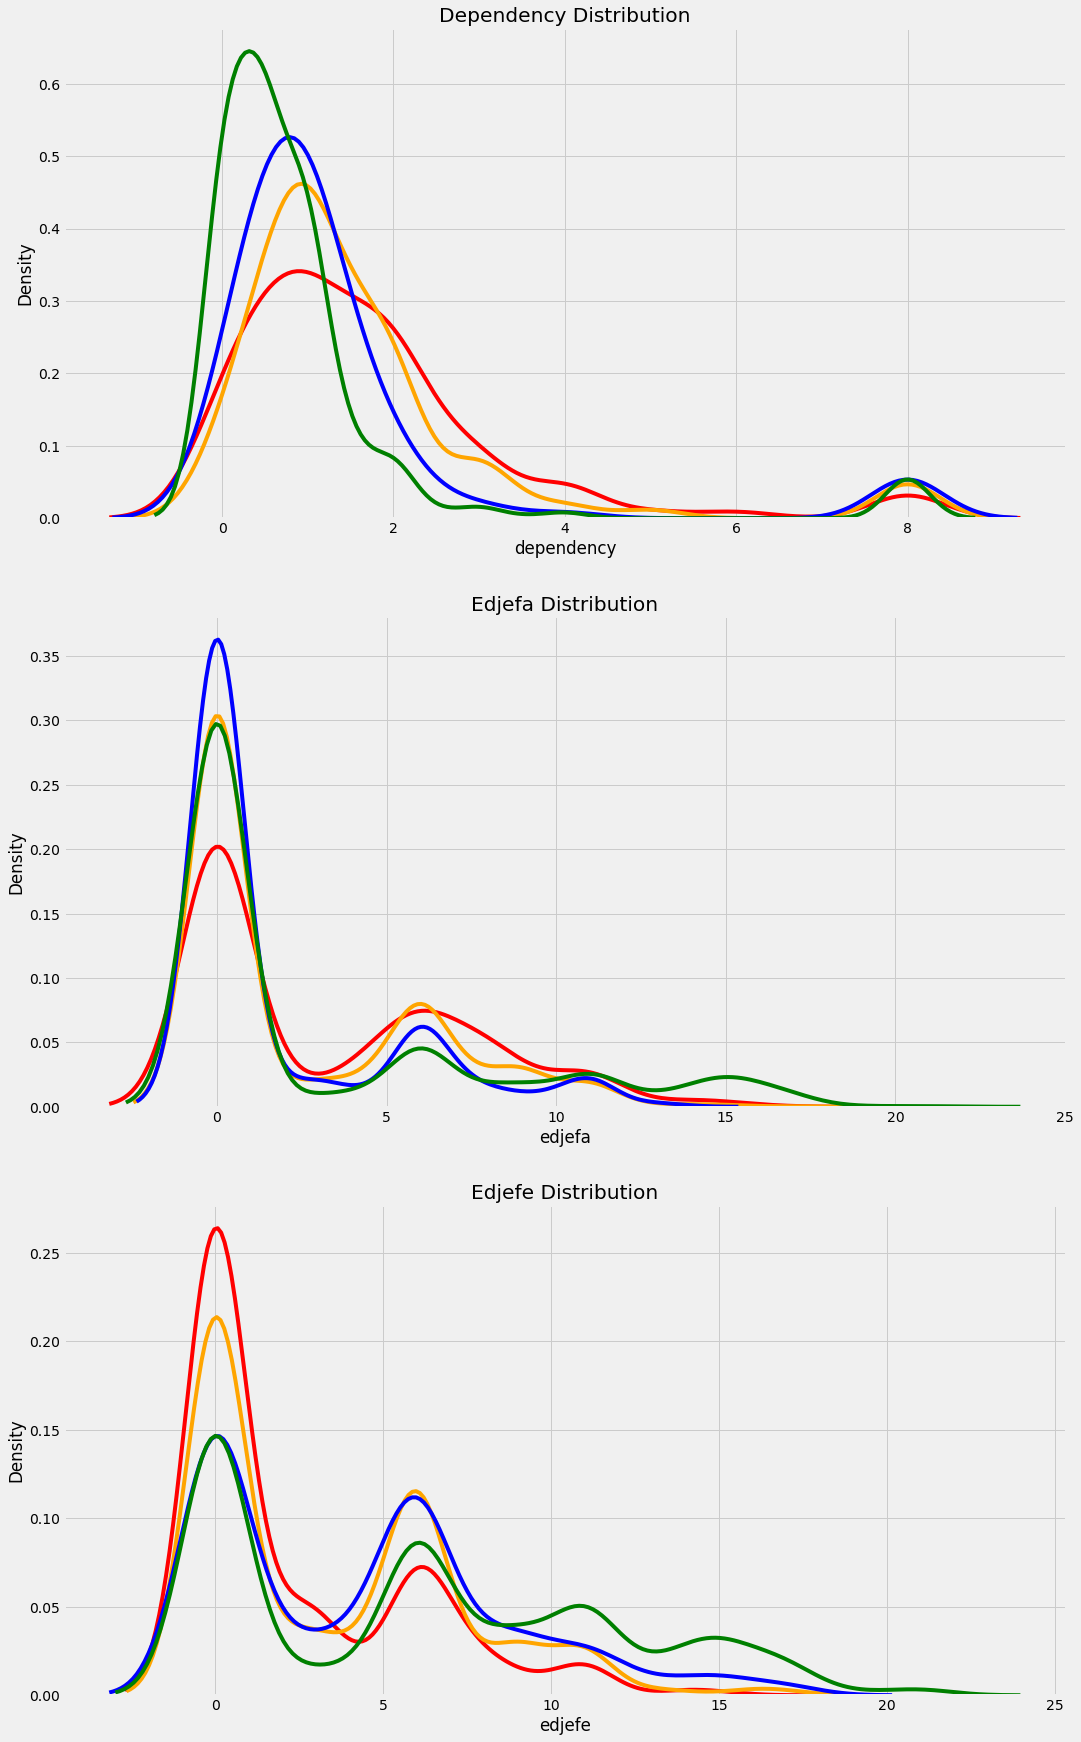

In [15]:
plt.figure(figsize = (16,12))

for i, col in enumerate(['dependency','edjefa','edjefe']) :
    ax = plt.subplot(3, 1, i+1)
    for poverty_level, color in colors.items():
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(),
                   ax = ax , color = color, label = poverty_mapping[poverty_level])
    plt.title(f'{col.capitalize()} Distribution')
    plt.xlabel(f'{col}')
    plt.ylabel('Density')

plt.subplots_adjust(top = 2)

In [16]:
#공통 value를 가진 새 변수를 데이터 프레임에 추가
test['Target'] = np.nan

data = train.append(test, ignore_index = True)
data.shape
#train test 모두 합친 data

(33413, 143)

In [17]:
print(train.shape, test.shape)

(9557, 143) (23856, 143)


In [18]:
9557 + 23856

33413

### exploring label distribution

1.0     222
2.0     442
3.0     355
4.0    1954
Name: Target, dtype: int64

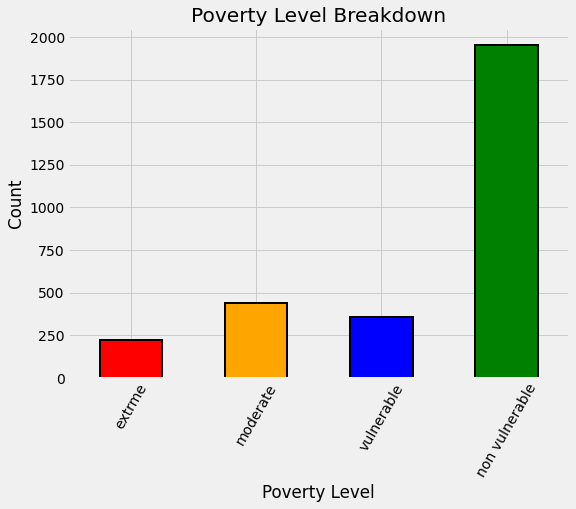

In [19]:
heads = data.loc[data['parentesco1'] == 1].copy()

train_labels = data.loc[(data['Target'].notnull()) & (data['parentesco1'] == 1), ['Target','idhogar']]

label_counts = train_labels['Target'].value_counts().sort_index()

label_counts.plot.bar(figsize = (8,6),
                     color = colors.values(),
                     edgecolor = 'k', linewidth = 2)

plt.xlabel('Poverty Level')
plt.ylabel('Count')
plt.xticks([x - 1 for x in poverty_mapping.keys()],
          list(poverty_mapping.values()), rotation = 60)
#plt.xticks([x 축에서 위치 지정 - 리스트로 설정],[각 위치에 들어갈 value값 (이름)])
plt.title('Poverty Level Breakdown')

label_counts

#### F1 score 의 기능 / weighted F1
    * because of imbalanced class problem 

#### problem with imbalanced classification problems is that the machine learning model can have a difficult time predicting the minority classes
    * data minig 0-1 losses function? 에서 배웠던 개념으로 할 수 없나?
    * 층화추출이었나??


#### wrong lables
    * have to figure out the  reason why the labels are wrong
    * how to address the issue on our own.
    (약간 독해가 안되는데)

### Identify Errors

In [20]:
all_equal = train.groupby('idhogar')['Target'].apply(lambda x : x.nunique() == 1)

not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target'.format(len(not_equal)))

There are 85 households where the family members do not all have the same target


In [21]:
train.groupby('idhogar').head()
#train에 비해서 열이 줄긴 했는데, idhogar에 의해 groupby 된 건지는 모르겠는데

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,0.00,10.0,0.0,10.00,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8.00,12.0,0.0,12.00,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8.00,0.0,11.0,11.00,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,1.00,11.0,0.0,11.00,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,1.00,11.0,0.0,11.00,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,ID_d45ae367d,80000.0,0,6,0,1,1,0,NaN,0,2,2,1,2,3,1,4,5,5,5,9,NaN,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0

In [22]:
train.groupby('idhogar')['Target'].nunique()
#중복돼서 나오지 않은 idhogar인가?

idhogar
001ff74ca    1
003123ec2    1
004616164    1
004983866    1
005905417    1
            ..
ff9343a35    1
ff9d5ab17    1
ffae4a097    1
ffe90d46f    1
fff7d6be1    1
Name: Target, Length: 2988, dtype: int64

In [23]:
train[train['idhogar'] == not_equal.index[0]][['idhogar','parentesco1','Target']]

,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


### Families without heads of household

In [24]:
households_leader = train.groupby('idhogar')['parentesco1'].sum()

households_no_head = train.loc[train['idhogar'].isin(households_leader[households_leader == 0].index),:]

print('There are {} households without a head.'.format(households_no_head['idhogar'].nunique()))

There are 15 households without a head.


In [25]:
households_no_head_equal = households_no_head.groupby('idhogar')['Target'].apply(lambda x : x.nunique() == 1)
#lambda x: x.nunique() == 1 이걸 왜 하는거야?
print('{} Households with no head have different labels'.format(sum(households_no_head_equal == False)))

0 Households with no head have different labels


### Correct Errors

In [26]:
for household in not_equal.index:
    true_target = int(train[(train['idhogar'] == household) & (train['parentesco1'] == 1.0)]['Target'])
    
    train.loc[train['idhogar'] == household, 'Target'] = true_target
    
all_equal = train.groupby('idhogar')['Target'].apply(lambda x : x.nunique() == 1)
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 0 households where the family members do not all have the same target.


## EDA
   ### Missing Values
   ###### determing how to handle them.
   ###### have to be filled in before we use a machine learning model
   ###### we have to start digging into the data definitions.

In [27]:
# look at the percentage of missing values in each columns
missing = pd.DataFrame(data.isnull().sum()).rename(columns = {0:'total'})
#.rename(columns = {0:'total'}) - pd.DataFrame()하면 기본 컬럼명이 0이고 이걸 바꿨을 뿐
missing['percent'] = missing['total']/ len(data)
missing.sort_values('percent',ascending = False).head(10).drop('Target')

,total,percent
rez_esc,27581,0.825457
v18q1,25468,0.762218
v2a1,24263,0.726154
SQBmeaned,36,0.001077
meaneduc,36,0.001077
hogar_adul,0,0.000000
parentesco10,0,0.000000
parentesco11,0,0.000000
parentesco12,0,0.000000


In [28]:
def plot_value_counts(df, col, heads_only = False):
    if heads_only:
        df = df.loc[df['parentesco1'] == 1].copy()
    
    plt.figure(figsize = (8,6))
    df[col].value_counts().sort_index().plot.bar(color = 'pink',
                                                edgecolor = 'k',
                                                linewidth = 2)
    #sort_index : 데이터 정렬
    plt.xlabel(f'{col}')
    plt.title(f'{col} Value Counts')
    plt.show()

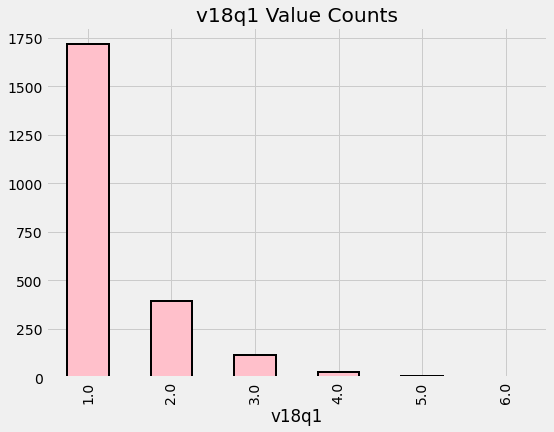

In [29]:
plot_value_counts(heads, 'v18q1')

* 뭐라고 주절 거리는데 뭐라는거야?
##### need to think about the data that is missing.
##### it could be that families with a nan in this category just do not own a tablet.

In [30]:
heads.groupby('v18q')['v18q1'].apply(lambda x : x.isnull().sum())

v18q
0    8044
1       0
Name: v18q1, dtype: int64

Text(0.5, 1.0, 'Home Ownership status for households missing rent payments')

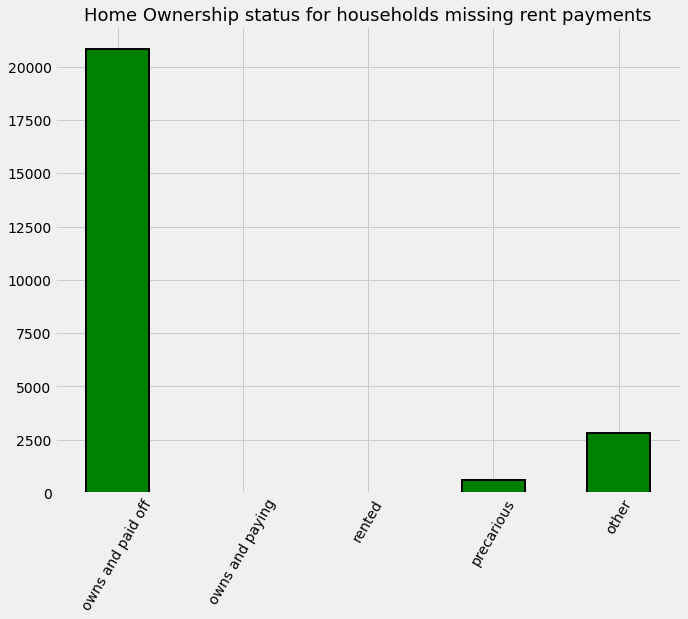

In [31]:
#v2a1

own_variables = [x for x in data if x.startswith('tipo')]

data.loc[data['v2a1'].isnull(), own_variables].sum().plot.bar(figsize = (10,8),
                                                             color = 'green',
                                                             edgecolor = 'k',
                                                             linewidth = 2)
plt.xticks([0,1,2,3,4],
          ['owns and paid off','owns and paying','rented','precarious','other'],
          rotation = 60)
plt.title('Home Ownership status for households missing rent payments', size = 18)

In [32]:
data.loc[(data['tipovivi1'] == 1),'v2a1'] = 0

data['v2a1-missing'] = data['v2a1'].isnull()
data['v2a1-missing'].value_counts()

False    29994
True      3419
Name: v2a1-missing, dtype: int64

In [33]:
data.loc[data['rez_esc'].notnull()]['age'].describe()

count    5832.000000
mean       12.185700
std         3.198618
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

In [34]:
data.loc[((data['age'] > 19) | (data['age'] < 7)) & (data['rez_esc'].isnull()), 'rez_esc'] = 0

data['rez_esc-missing'] = data['rez_esc'].isnull()

In [35]:
data.loc[data['rez_esc'] > 5, 'rez_esc'] = 5

### plot two categorical variables
how two categorical variables interact with one another, there are a number of plotting options :
* scatterplots, facted plots, boxplots, etc

* scatterplot of two categoricals where the size of the points represent the percentage of a given y-value represented by each x-value

In [36]:
def plot_categoricals(x,y,data,annotate = True):
    raw_counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize = False))
    raw_counts = raw_counts.rename(columns = {x : 'raw_count'})
    
    counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize = True))
    
    counts = counts.rename(columns = {x: 'normalized_count'}).reset_index()
    counts['percent'] = 100 * counts['normalized_count']
    
    counts['raw_count'] = list(raw_counts['raw_count'])
    
    plt.figure(figsize = (14,10))
    plt.scatter(counts[x], counts[y], edgecolor = 'k', color = 'lightblue',
               s = 100 * np.sqrt(counts['raw_count']), marker = 'o',
               alpha = 0.6, linewidth = 1.5)
    
    if annotate:
        for i, row in counts.iterrows():
            plt.annotate(xy = (row[x] - (1/counts[x].nunique()),
                              row[y] - (0.15 / counts[y].nunique())),
                        color = 'navy', s = f"{round(row['percent'], 1)}%")
            
    plt.yticks(counts[y].unique())
    plt.xticks(counts[x].unique())
    
    sqr_min = int(np.sqrt(raw_counts['raw_count'].min()))
    sqr_max = int(np.sqrt(raw_counts['raw_count'].max()))
    
    msizes = list(range(sqr_min, sqr_max,
                 int((sqr_max - sqr_min) / 5)))
    markers = []
    
    for size in msizes :
        markers.append(plt.scatter([],[],s=100*size,
                                  label = f'{int(round(np.square(size) / 100) * 100)}',
                                  color = 'lightgreen',
                                  alpha = 0.6, edgecolor = 'k', linewidth = 1.5))
    plt.legend(handles = markers, title = 'Counts',
              labelspacing = 3 ,handletextpad = 2,
              fontsize = 16, loc = (1.10, 0.19))
    plt.annotate(f'* Size represents raw count while % is for a given y value', 
                xy = (0,1), xycoords = 'figure points', size= 10)
    plt.xlim((counts[x].min() - (6 / counts[x].nunique()),
             counts[x].max() + (6 / counts[x].nunique())))
    plt.ylim((counts[x].min() - (4 / counts[y].nunique()),
             counts[x].max() + (4 / counts[y].nunique())))
    plt.grid(None)
    plt.xlabel(f"{x}")
    plt.ylabel(f"{y}")
    plt.title(f"{y} vs {x}")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


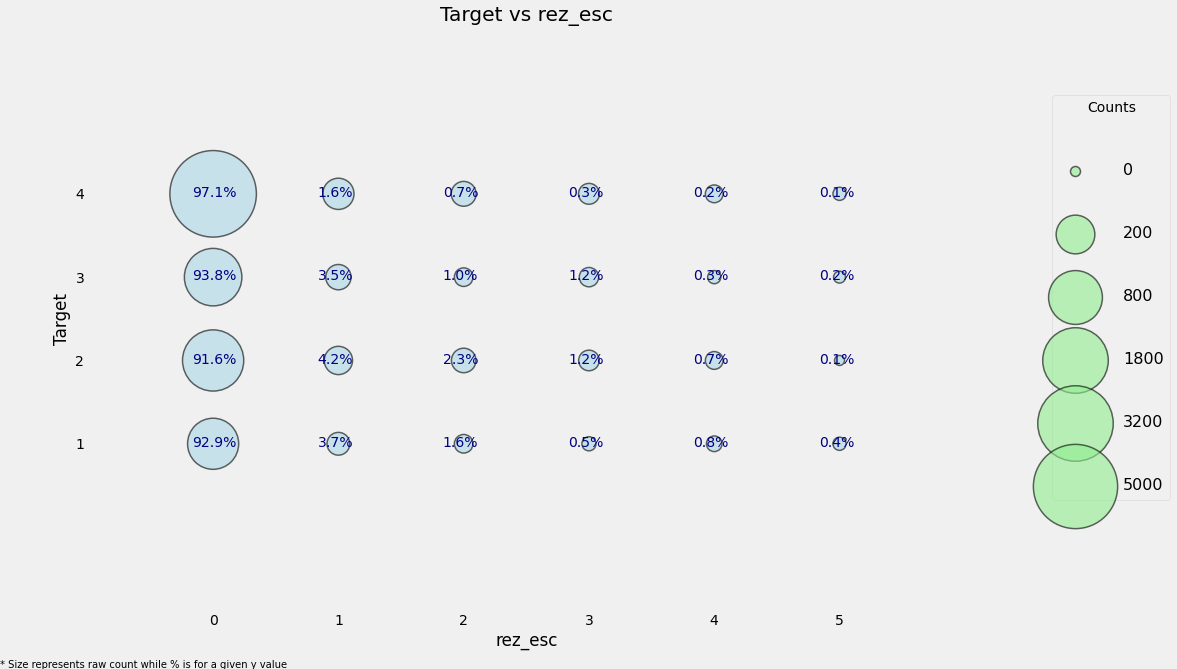

In [37]:
plot_categoricals('rez_esc','Target', data)
#이게 의미하는 바가 뭐야?
#왜 중간부터 흔들렸지?
#코드가 뭘 의미하는지 모르기 시작했고
#

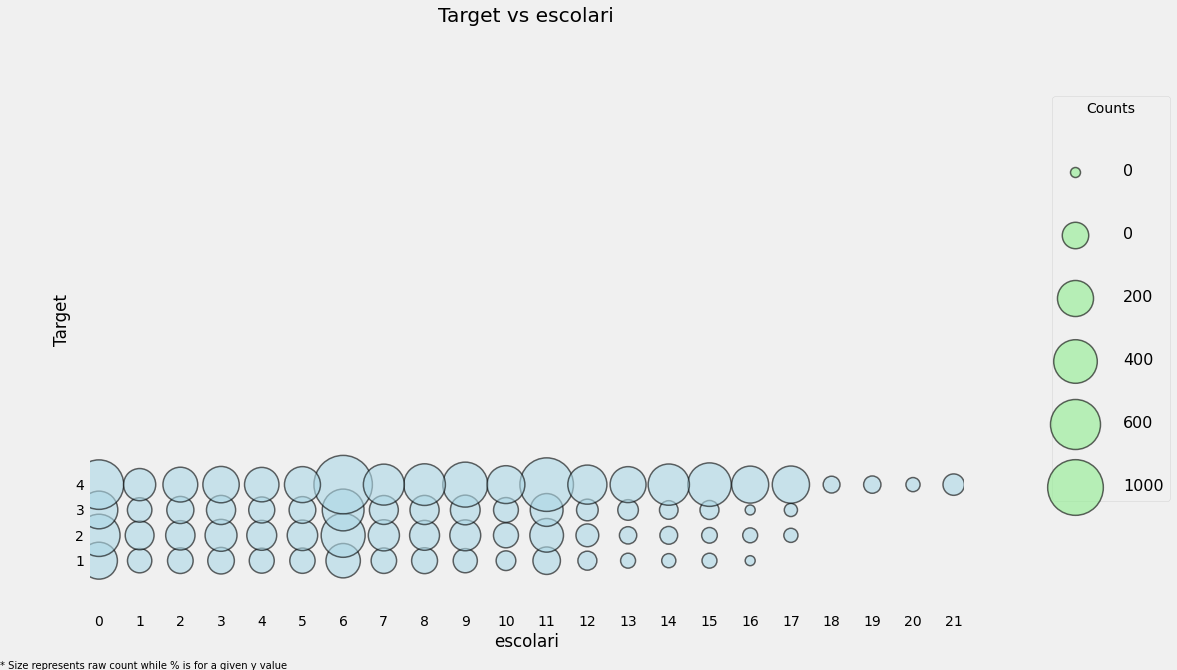

In [38]:
plot_categoricals('escolari','Target',data, annotate = False)

### Imputation
* filling in missing values
* one of the simplest and most effective methods is to fill in the missing values with the median of the column.

#### as a final step with the missing values, we can plot the distribution of target for the case where either of these values are missing.

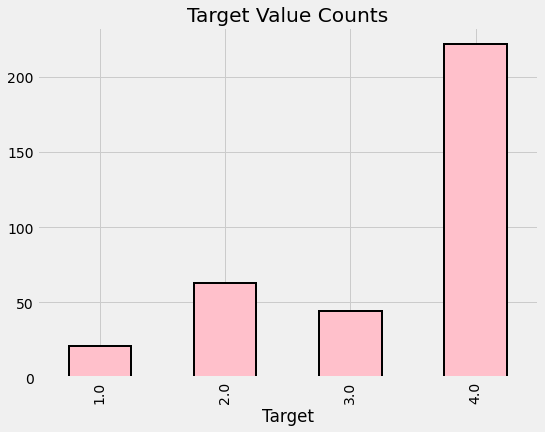

In [39]:
plot_value_counts(data[(data['rez_esc-missing'] == 1)], 'Target')

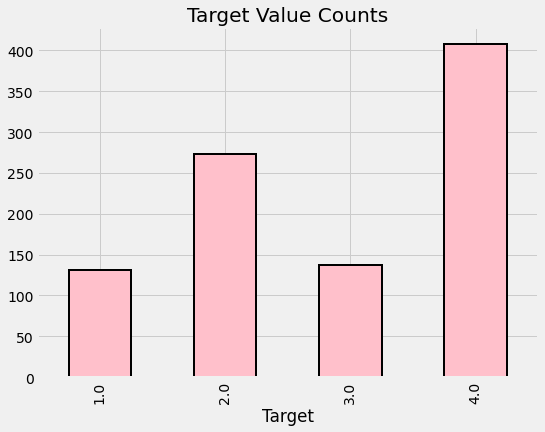

In [40]:
plot_value_counts(data[(data['v2a1-missing'] == 1)], 'Target')

## Feature Engineering
* define the columns that are at an individual level and at a household level using the data descriptions.
#### suitable aggregations for the individual level data
    * ordinal variables can use statistical aggregations
    * boolean variables can also be aggregated but with fewer stats

In [41]:
id_ = ['Id','idhogar','Target']

In [42]:
ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone', 'rez_esc-missing']

ind_ordered = ['rez_esc','escolari','age']

In [43]:
hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2', 'v2a1-missing']

hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

In [44]:
sqr_ = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

In [45]:
x = ind_bool + ind_ordered + id_ + hh_bool + hh_ordered + hh_cont + sqr_

from collections import Counter

print('There are no repeats : ', np.all(np.array(list(Counter(x).values())) == 1))
print('We covered every variables : ', len(x) == data.shape[1])

There are no repeats :  True
We covered every variables :  True


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Squared Age versus Age')

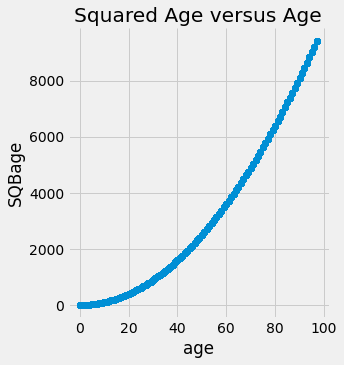

In [46]:
sns.lmplot('age','SQBage',data = data, fit_reg = False)
plt.title('Squared Age versus Age')

In [47]:
data = data.drop(columns = sqr_)

In [48]:
data.shape

(33413, 136)

In [49]:
heads = data.loc[data['parentesco1'] == 1, :]
heads = heads[id_ + hh_bool + hh_cont + hh_ordered]
heads.shape

(10307, 99)

the correlations between all of the household variables.
if there are any that are too highly correlated, then we might want to remove one of the pair of highly correlated variables.

In [50]:
corr_matrix = heads.corr()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']

In [51]:
corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9]
#상관행렬에서 tamhog 컬럼에 대한 상관계수 절댓값이 0.9 이상인 컬럼만 선별한건가?

,r4t3,tamhog,tamviv,hhsize,hogar_total
r4t3,1.000000,0.998287,0.910457,0.998287,0.998287
tamhog,0.998287,1.000000,0.909155,1.000000,1.000000
tamviv,0.910457,0.909155,1.000000,0.909155,0.909155
hhsize,0.998287,1.000000,0.909155,1.000000,1.000000
hogar_total,0.998287,1.000000,0.909155,1.000000,1.000000


<AxesSubplot:>

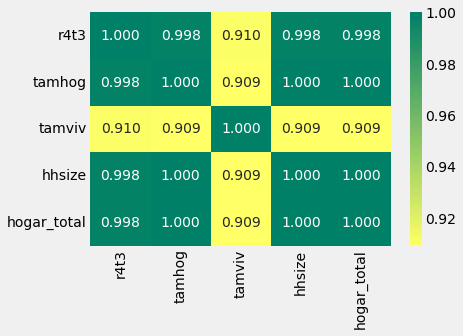

In [52]:
sns.heatmap(corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9,
                           corr_matrix['tamhog'].abs() > 0.9],
           annot = True, cmap = plt.cm.summer_r, fmt = '.3f')

In [53]:
heads = heads.drop(columns = ['tamhog', 'hogar_total','r4t3'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Household size vs number of persons living in the household')

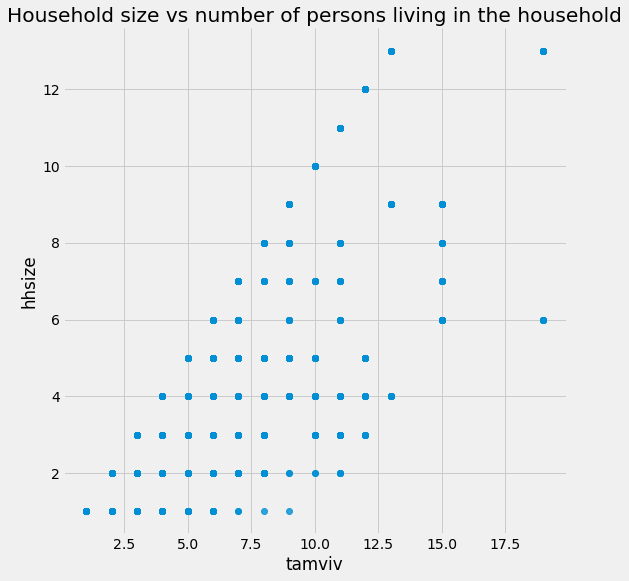

In [54]:
sns.lmplot('tamviv', 'hhsize', data, fit_reg = False, size = 8)
plt.title('Household size vs number of persons living in the household')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


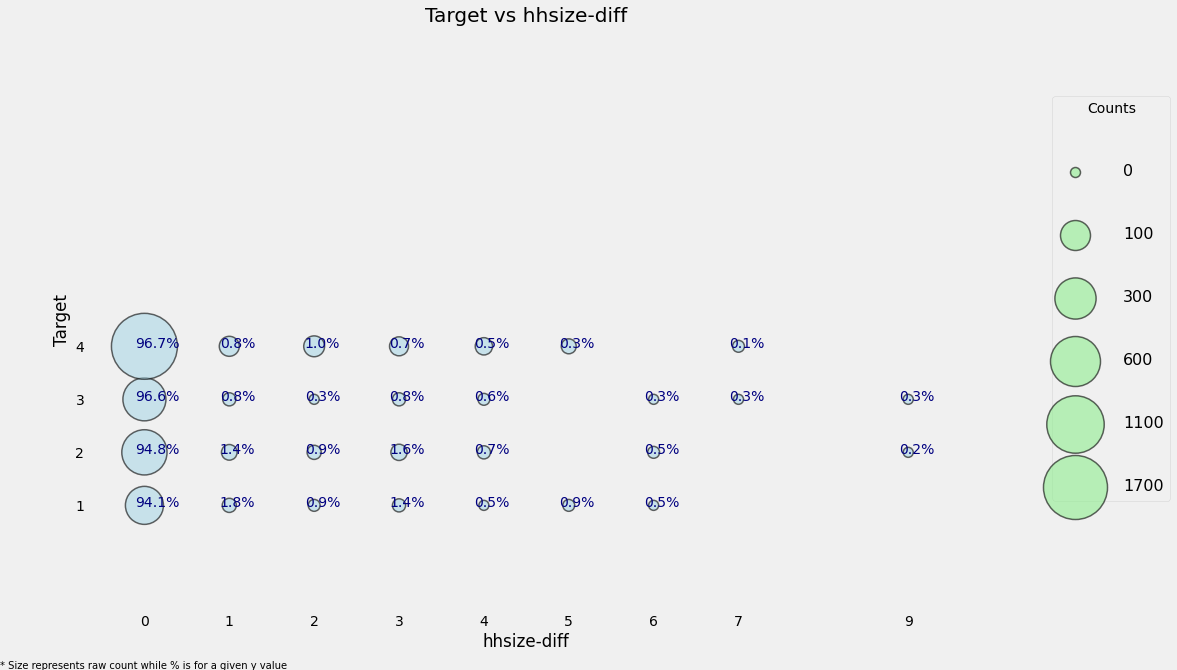

In [55]:
heads['hhsize-diff'] = heads['tamviv'] - heads['hhsize']
plot_categoricals('hhsize-diff', 'Target', heads)

In [56]:
corr_matrix.loc[corr_matrix['coopele'].abs() > 0.9, corr_matrix['coopele'].abs() > 0.9]

,public,coopele
public,1.000000,-0.967759
coopele,-0.967759,1.000000


In [57]:
elec = []

for i , row in heads.iterrows():
#각 행별로 컬럼값 추출
    if row['noelec'] == 1:
        elec.append(0)
#'noelec'라는 컬럼의 값이 1이라면 elec에 0을 추가해라
    elif row['coopele'] == 1:
        elec.append(1)
    elif row['public'] == 1:
        elec.append(2)
    elif row['planpri'] == 1:
        elec.append(3)
    else :
        elec.append(np.nan)

heads['elec'] = elec
heads['elec-missing'] = heads['elec'].isnull()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


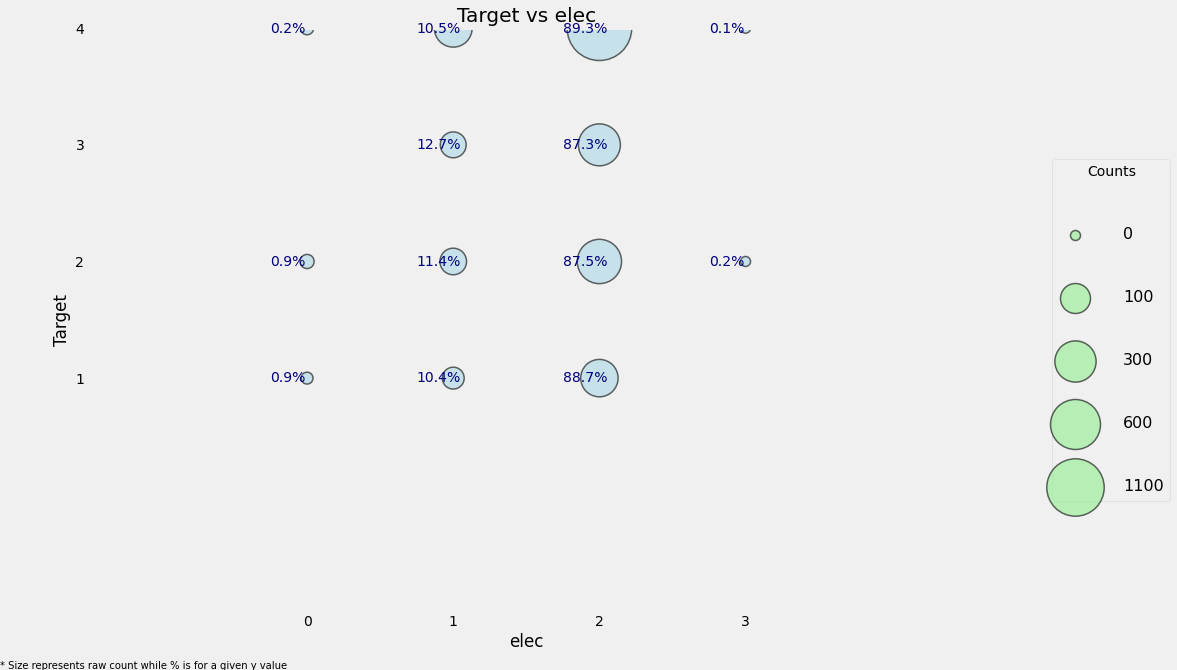

In [58]:
plot_categoricals('elec','Target',heads)

In [59]:
heads = heads.drop(columns = 'area2')
heads.groupby('area1')['Target'].value_counts(normalize=True)

area1  Target
0      4.0       0.582249
       2.0       0.176331
       3.0       0.147929
       1.0       0.093491
1      4.0       0.687030
       2.0       0.137688
       3.0       0.108083
       1.0       0.067199
Name: Target, dtype: float64

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


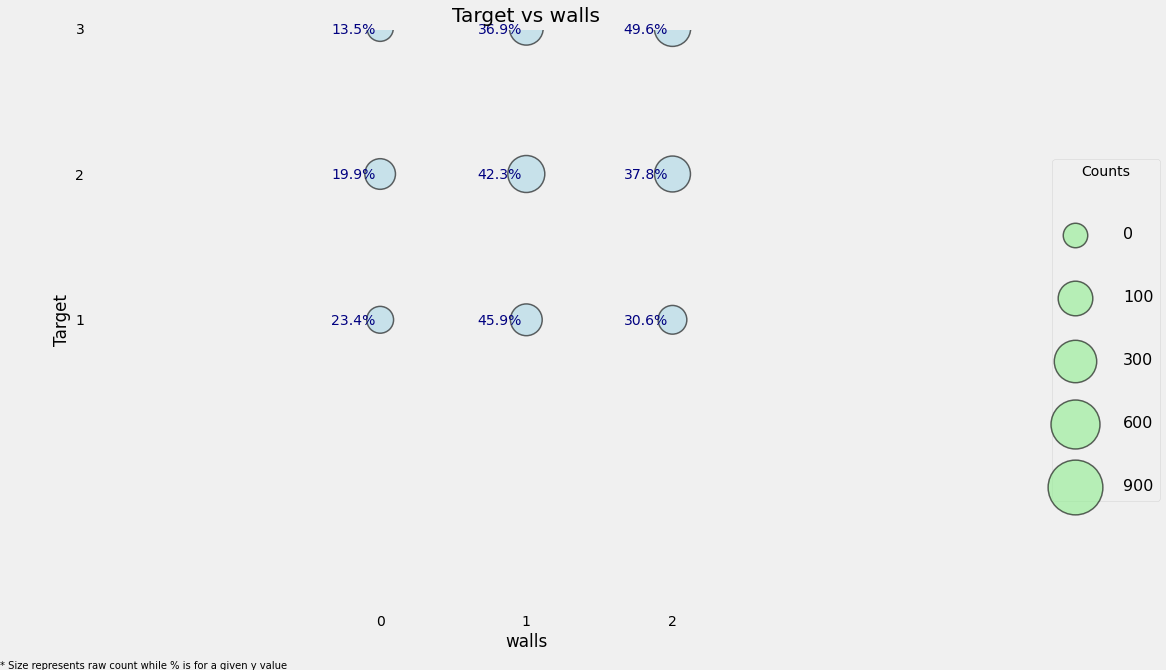

In [60]:
heads['walls'] = np.argmax(np.array(heads[['epared1','epared2','epared3']]),
                          axis = 1)
plot_categoricals('walls','Target',heads)
#이거 수정할 방법없냐?

In [61]:
heads['roof'] = np.argmax(np.array(heads[['etecho1','etecho2','etecho3']]), axis = 1)
heads = heads.drop(columns = ['etecho1','etecho2','etecho3'])
heads['floor'] = np.argmax(np.array(heads[['eviv1','eviv2','eviv3']]), axis = 1)

### Feature Construction
* mapping variables to ordinal features, we can also create entirely new features from the existing data, known as feature construction.

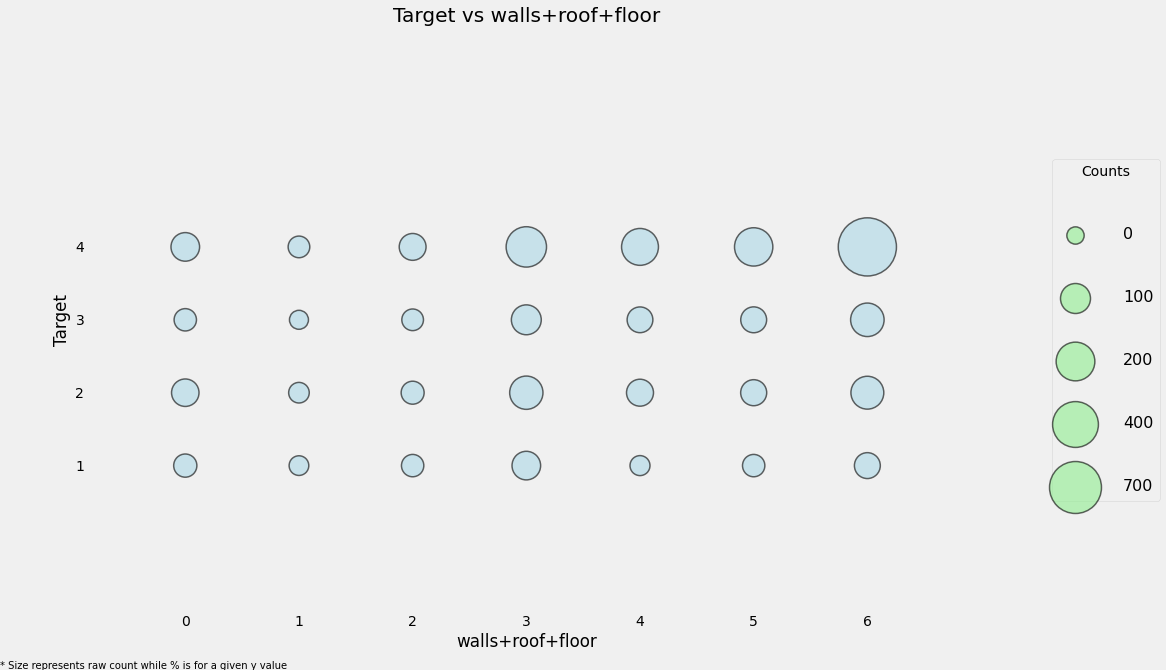

In [62]:
heads['walls+roof+floor'] = heads['walls'] + heads['roof'] + heads['floor']

plot_categoricals('walls+roof+floor', 'Target', heads, annotate = False)
#annotate : 주석 - 도표(원) 안에 숫자를 쓸 지 말 지

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


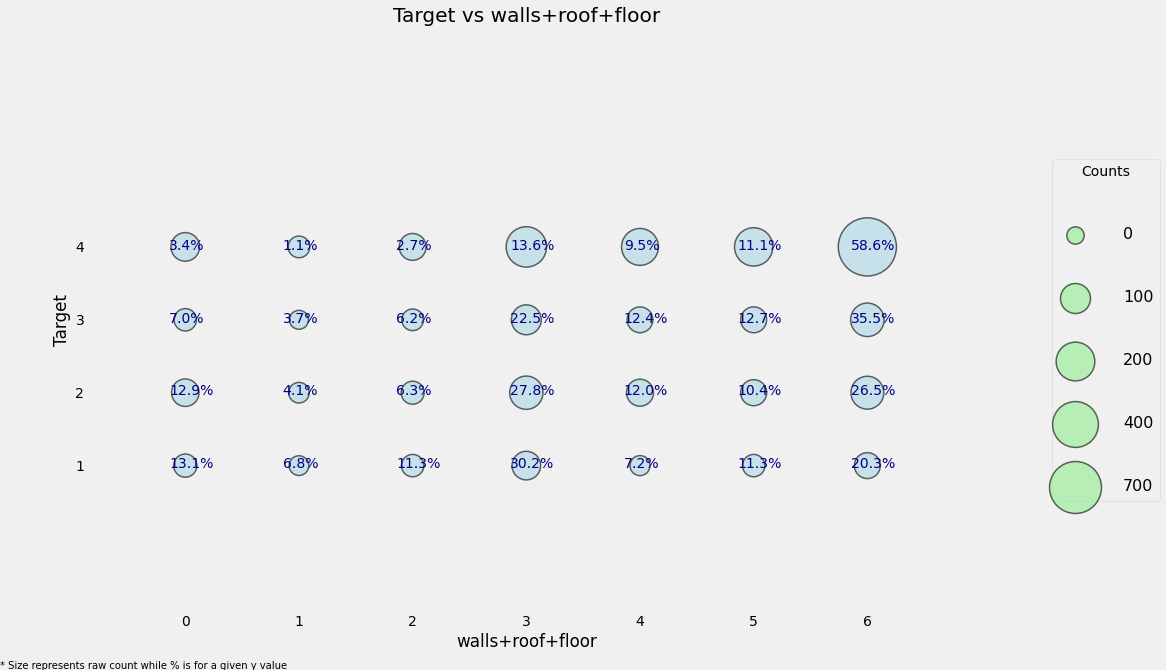

In [63]:
plot_categoricals('walls+roof+floor', 'Target', heads, annotate = True)

In [64]:
counts = pd.DataFrame(heads.groupby(['walls+roof+floor'])['Target'].value_counts(normalize = True)).rename(columns = {'Target' : 'Normalized Count'}).reset_index()
counts.head()

,walls+roof+floor,Target,Normalized Count
0,0,4.0,0.376404
1,0,2.0,0.320225
2,0,1.0,0.162921
3,0,3.0,0.140449
4,1,4.0,0.323529


In [65]:
heads['warning'] = 1 * (heads['sanitario1'] +
                       (heads['elec'] == 0) + 
                       heads['pisonotiene'] + 
                       heads['abastaguano'] +
                       (heads['cielorazo'] == 0))

#### seaborn - violinplot
shows the distribution of a variable on the y axis with the width of each plot showing the number of observations in that category

Text(0.5, 1.0, 'Target vs Warning Variables')

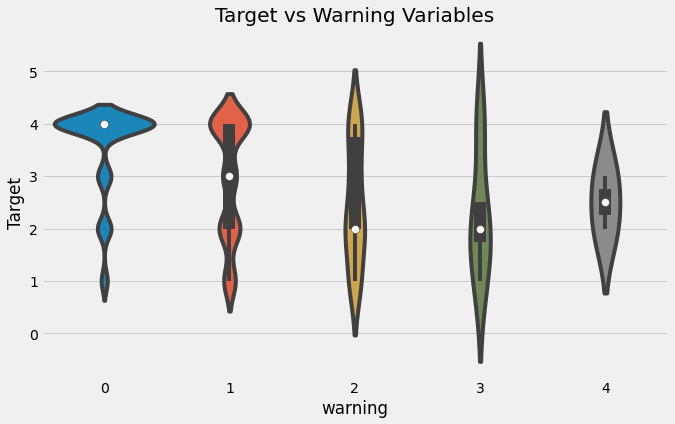

In [66]:
plt.figure(figsize = (10,6))
sns.violinplot(x = 'warning', y = 'Target', data = heads)
plt.title('Target vs Warning Variables')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


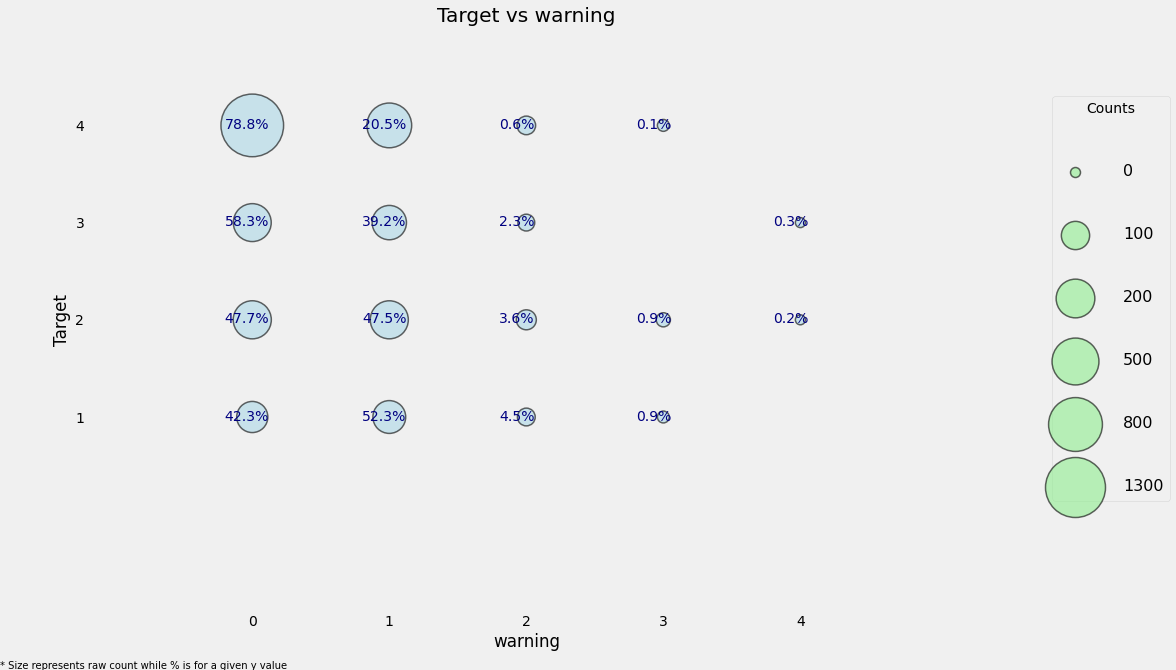

In [67]:
plot_categoricals('warning','Target', data= heads)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Target vs Bonus Variables')

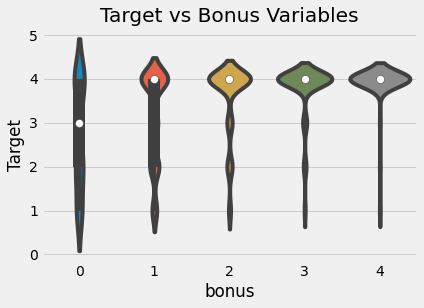

In [68]:
heads['bonus'] = 1 * (heads['refrig'] +
                      heads['computer'] + 
                      (heads['v18q1'] > 0) +
                      heads['television'])
#이걸 어떻게 계산한거아?

sns.violinplot('bonus', 'Target', data = heads,
              figsize = (10,6))
plt.title('Target vs Bonus Variables')
#왜 하는거야?
#분포를 확인 중인 것 같은데 이게 무슨 의도로 하고 무슨 의미를 갖는지?

In [69]:
(heads['v18q1'] > 0) + heads['television']

0        0
1        1
2        0
5        1
8        0
        ..
33393    0
33398    0
33400    0
33404    0
33409    0
Length: 10307, dtype: int64

### Per Capita Features